# Delivery Cost Analysis and Billing Discrepancy Detection System for E-commerce Companies

## Table of Contents

* [Abstract](#section-1)
* [Problem statement](#section-2)
* [Data Preparation](#section-3)
* [Expected Billing Amount Calculation](#section-4)
* [Additional Data Processing](#section-5)
* [Exploratory Data Analysis ](#section-6)
* [Results Exporting](#section-7)
* [Conclusion ](#section-8)
* [References](#section-9)


## Abstract: 
<a id='section-1'></a>
    The project aims to develop a system that analyzes the delivery cost and detects billing discrepancies for e-commerce companies. The system utilizes data from the warehouse, courier company, and order details to calculate the expected delivery charges and compares it with the billing amount charged by the courier company. The system also provides a detailed report of the weight slab and delivery zones charged by the courier company, along with the expected and billed charges. The system helps e-commerce companies to identify any discrepancies in the billing and ensure transparency in their billing process, ultimately reducing their costs and increasing customer satisfaction.

## Problem statement:
<a id='section-2'></a>
    "An e-commerce company wants to optimize its shipping operations by analyzing the discrepancies between the expected shipping charges and the billed charges by the courier company. The goal is to identify patterns and factors that contribute to these discrepancies and to develop strategies to reduce the difference between the expected and billed charges, while maintaining a high level of customer satisfaction and minimizing operational costs."

## Data Preparation:
<a id='section-3'></a>

In [2]:
import pandas as pd

In [3]:
df_order_report = pd.read_excel('Company X - Order Report.xlsx')
print(df_order_report.shape)
df_order_report.head()

(400, 3)


,ExternOrderNo,SKU,Order Qty
0,2001827036,8904223818706,1.0
1,2001827036,8904223819093,1.0
2,2001827036,8904223819109,1.0
3,2001827036,8904223818430,1.0
4,2001827036,8904223819277,1.0


In [192]:
df_order_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ExternOrderNo  400 non-null    int64  
 1   SKU            400 non-null    object 
 2   Order Qty      400 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.5+ KB


In [193]:
df_order_report['Order Qty'].value_counts()

1.0    334
2.0     48
4.0     11
8.0      3
6.0      3
3.0      1
Name: Order Qty, dtype: int64

In [26]:
df_pincode_zones = pd.read_excel('Company X - Pincode Zones.xlsx')
print(df_pincode_zones.shape)
df_pincode_zones.sample(5)

(124, 3)


,Warehouse Pincode,Customer Pincode,Zone
65,121003,321001,b
12,121003,248006,b
102,121003,175101,e
79,121003,307026,b
53,121003,742103,d


In [194]:
df_pincode_zones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Warehouse Pincode  124 non-null    int64 
 1   Customer Pincode   124 non-null    int64 
 2   Zone               124 non-null    object
dtypes: int64(2), object(1)
memory usage: 3.0+ KB


In [5]:
df_pincode_zones['Customer Pincode'].nunique()

108

In [34]:
df_pincode_zones['Zone'].value_counts()

b    79
d    38
e     7
Name: Zone, dtype: int64

In [6]:
df_sku_weight = pd.read_excel('Company X - SKU Master.xlsx')
print(df_sku_weight.shape)
df_sku_weight.head()

(66, 2)


,SKU,Weight (g)
0,8904223815682,210
1,8904223815859,165
2,8904223815866,113
3,8904223815873,65
4,8904223816214,120


In [7]:
df_invoice_courier = pd.read_excel('Courier Company - Invoice.xlsx')
print(df_invoice_courier.shape)
df_invoice_courier.head()

(124, 8)


,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4


In [196]:
df_invoice_courier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AWB Code              124 non-null    int64  
 1   Order ID              124 non-null    int64  
 2   Charged Weight        124 non-null    float64
 3   Warehouse Pincode     124 non-null    int64  
 4   Customer Pincode      124 non-null    int64  
 5   Zone                  124 non-null    object 
 6   Type of Shipment      124 non-null    object 
 7   Billing Amount (Rs.)  124 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 7.9+ KB


In [8]:
df_weight_slab = pd.read_excel('Courier Company - Rates.xlsx')
print(df_weight_slab.shape)
df_weight_slab

(5, 6)


,Zone,Weight Slabs,Forward Fixed Charge,Forward Additional Weight Slab Charge,RTO Fixed Charge,RTO Additional Weight Slab Charge
0,A,0.25,29.5,23.6,13.6,23.6
1,B,0.50,33.0,28.3,20.5,28.3
2,C,0.75,40.1,38.9,31.9,38.9
3,D,1.25,45.4,44.8,41.3,44.8
4,E,1.50,56.6,55.5,50.7,55.5


In [9]:
df_expected = pd.read_excel('Expected_Result.xlsx')
df_expected

,Unnamed: 0,Count,Amount
0,Total Orders - Correctly Charged,1.0,135.0
1,Total Orders - Over Charged,1.0,-141.5
2,Total Orders - Under Charged,NaN,NaN


In [14]:
df_order_report.ExternOrderNo.nunique()

124

In [15]:
df_order_report.SKU.nunique()

65

In [17]:
df_sku_weight.SKU.nunique()

65

In [19]:
df_pincode_zones['Customer Pincode'].nunique()

108

#### Merging:
Merging two dataframes on the 'SKU' column and adding a new column 'Weight (kg)' after converting 'Weight (g)' column to kilograms, followed by printing the shape and head of the resulting merged dataframe.

In [61]:
merged_df = pd.merge(df_order_report, df_sku_weight, on='SKU', how='left')
merged_df['Weight (kg)'] = merged_df['Weight (g)']/1000
print(merged_df.shape)
merged_df.head()

(401, 5)


,ExternOrderNo,SKU,Order Qty,Weight (g),Weight (kg)
0,2001827036,8904223818706,1.0,127,0.127
1,2001827036,8904223819093,1.0,150,0.150
2,2001827036,8904223819109,1.0,100,0.100
3,2001827036,8904223818430,1.0,165,0.165
4,2001827036,8904223819277,1.0,350,0.350


In [62]:
merged_df['Weight (kg)'] = merged_df['Weight (kg)'].round(2)

In [63]:
merged_df['Weight (kg)'].describe()

count    401.000000
mean       0.181272
std        0.092737
min        0.010000
25%        0.120000
50%        0.130000
75%        0.240000
max        0.600000
Name: Weight (kg), dtype: float64

Let's calculate the total weight of each order by multiplying the weight per unit with the order quantity.

In [64]:
merged_df['Weight (kg)'] = merged_df['Weight (kg)'] * merged_df['Order Qty']

In [65]:

merged_df.rename(columns = {'ExternOrderNo': 'Order ID'},inplace=True)
merged_df

,Order ID,SKU,Order Qty,Weight (g),Weight (kg)
0,2001827036,8904223818706,1.0,127,0.13
1,2001827036,8904223819093,1.0,150,0.15
2,2001827036,8904223819109,1.0,100,0.10
3,2001827036,8904223818430,1.0,165,0.16
4,2001827036,8904223819277,1.0,350,0.35
...,...,...,...,...,...
396,2001806229,8904223818942,1.0,133,0.13
397,2001806229,8904223818850,1.0,240,0.24
398,2001806226,8904223818850,2.0,240,0.48
399,2001806210,8904223816214,1.0,120,0.12


In [19]:
df_invoice_courier['Type of Shipment'].value_counts()

Forward charges            109
Forward and RTO charges     15
Name: Type of Shipment, dtype: int64

In [21]:
df_invoice_courier['Customer Pincode'].nunique()

108

In [27]:
df_pincode_zones.rename(columns={'Zone': 'Zone X'})

,Warehouse Pincode,Customer Pincode,Zone X
0,121003,507101,d
1,121003,486886,d
2,121003,532484,d
3,121003,143001,b
4,121003,515591,d
...,...,...,...
119,121003,325207,b
120,121003,303702,b
121,121003,313301,b
122,121003,173212,e


Let's performs a left join on 'Customer Pincode' and 'Warehouse Pincode' columns of two dataframes, df_invoice_courier and df_pincode_zones, and assigns it to a new dataframe courier_pincode_merged.

In [66]:
courier_pincode_merged = pd.merge(df_invoice_courier,df_pincode_zones, on=['Customer Pincode','Warehouse Pincode'],how='left')
courier_pincode_merged

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone_x,Type of Shipment,Billing Amount (Rs.),Zone_y
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0,d
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2,d
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6,d
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3,b
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4,d
...,...,...,...,...,...,...,...,...,...
169,1091120922803,2001820978,0.50,121003,313301,d,Forward charges,45.4,b
170,1091121844806,2001811475,0.50,121003,173212,b,Forward charges,33.0,e
171,1091121844806,2001811475,0.50,121003,173212,b,Forward charges,33.0,e
172,1091121846136,2001811305,0.50,121003,302020,d,Forward charges,45.4,b


In [44]:
courier_pincode_merged['Customer Pincode'].nunique()

108

In [67]:
courier_pincode_merged.Zone_x.value_counts()

d    142
b     30
e      2
Name: Zone_x, dtype: int64

In [68]:
courier_pincode_merged['Zone_y'].value_counts()

b    127
d     38
e      9
Name: Zone_y, dtype: int64

In [54]:
merged_df['Order ID'].nunique()

124

Let's merge the data from the merged_df and courier_pincode_merged dataframes on the common column 'Order ID' and returns a new dataframe called all_df

In [149]:
all_df = pd.merge(merged_df,courier_pincode_merged,on='Order ID',how = 'left')
all_df

,Order ID,SKU,Order Qty,Weight (g),Weight (kg),AWB Code,Charged Weight,Warehouse Pincode,Customer Pincode,Zone_x,Type of Shipment,Billing Amount (Rs.),Zone_y
0,2001827036,8904223818706,1.0,127,0.13,1091122418320,1.60,121003,173213,b,Forward charges,117.9,e
1,2001827036,8904223819093,1.0,150,0.15,1091122418320,1.60,121003,173213,b,Forward charges,117.9,e
2,2001827036,8904223819109,1.0,100,0.10,1091122418320,1.60,121003,173213,b,Forward charges,117.9,e
3,2001827036,8904223818430,1.0,165,0.16,1091122418320,1.60,121003,173213,b,Forward charges,117.9,e
4,2001827036,8904223819277,1.0,350,0.35,1091122418320,1.60,121003,173213,b,Forward charges,117.9,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,2001806229,8904223818942,1.0,133,0.13,1091117222080,0.71,121003,421204,d,Forward charges,90.2,d
563,2001806229,8904223818850,1.0,240,0.24,1091117222080,0.71,121003,421204,d,Forward charges,90.2,d
564,2001806226,8904223818850,2.0,240,0.48,1091117222065,0.68,121003,723146,d,Forward charges,90.2,d
565,2001806210,8904223816214,1.0,120,0.12,1091117221940,2.92,121003,140604,b,Forward charges,174.5,b


In [71]:
all_df['Type of Shipment'].value_counts()

Forward charges            517
Forward and RTO charges     50
Name: Type of Shipment, dtype: int64

## Expected Billing Amount Calculation
<a id='section-4'></a>

Let's create function that calculates the billing charge for a given row based on the weight of the shipment, delivery zone charged by the courier company, and the type of shipment.

In [150]:
def calculate_billing_charge_zoney(row):
    weight = row['Weight (kg)']
    zone = row['Delivery Zone charged by Courier Company']
    shipment_type = row['Type of Shipment']
    
    # Get weight slab for the zone
    if zone == 'a':
        weight_slab = 0.25
        fwd_fixed_charge = 29.5
        fwd_additional_charge = 23.6
        rto_fixed_charge = 13.6
        rto_additional_charge = 23.6
    elif zone == 'b':
        weight_slab = 0.5
        fwd_fixed_charge = 33
        fwd_additional_charge = 28.3
        rto_fixed_charge = 20.5
        rto_additional_charge = 28.3
    elif zone == 'c':
        weight_slab = 0.75
        fwd_fixed_charge = 40.1
        fwd_additional_charge = 38.9
        rto_fixed_charge = 31.9
        rto_additional_charge = 38.9
    elif zone == 'd':
        weight_slab = 1.25
        fwd_fixed_charge = 45.4
        fwd_additional_charge = 44.8
        rto_fixed_charge = 41.3
        rto_additional_charge = 44.8
    elif zone == 'e':
        weight_slab = 1.5
        fwd_fixed_charge = 56.6
        fwd_additional_charge = 55.5
        rto_fixed_charge = 50.7
        rto_additional_charge = 55.5
    else:
        return None
    
    # Determine if Forward charges or Forward and RTO charges apply
    if shipment_type == 'Forward charges':
        fixed_charge = fwd_fixed_charge
        additional_charge = fwd_additional_charge
    elif shipment_type == 'Forward and RTO charges':
        fixed_charge = fwd_fixed_charge + rto_fixed_charge
        additional_charge = fwd_additional_charge + rto_additional_charge
    else:
        return None
    
    # Calculate billing charge based on weight slab
    total_weight = weight
    billing_charge = 0
    while total_weight > 0:
        if total_weight <= weight_slab:
            billing_charge += fixed_charge
            total_weight = 0
        else:
            billing_charge += fixed_charge + additional_charge
            total_weight -= weight_slab
    
    return billing_charge


In [151]:
all_df.columns

Index(['Order ID', 'SKU', 'Order Qty', 'Weight (g)', 'Weight (kg)', 'AWB Code',
       'Charged Weight', 'Warehouse Pincode', 'Customer Pincode', 'Zone_x',
       'Type of Shipment', 'Billing Amount (Rs.)', 'Zone_y'],
      dtype='object')

In [153]:
all_df.rename(columns = {'Zone_x':'Delivery Zone charged by Courier Company',
                         'Zone_y':'Delivery Zone as per X'},inplace=True)


Let's apply the function which we created previously on the all_df

In [154]:
all_df['Expected Charge as per X (Rs.)'] = all_df.apply(calculate_billing_charge_zoney, axis=1)


In [155]:
all_df.head()

,Order ID,SKU,Order Qty,Weight (g),Weight (kg),AWB Code,Charged Weight,Warehouse Pincode,Customer Pincode,Delivery Zone charged by Courier Company,Type of Shipment,Billing Amount (Rs.),Delivery Zone as per X,Expected Charge as per X (Rs.)
0,2001827036,8904223818706,1.0,127,0.13,1091122418320,1.6,121003,173213,b,Forward charges,117.9,e,33.0
1,2001827036,8904223819093,1.0,150,0.15,1091122418320,1.6,121003,173213,b,Forward charges,117.9,e,33.0
2,2001827036,8904223819109,1.0,100,0.10,1091122418320,1.6,121003,173213,b,Forward charges,117.9,e,33.0
3,2001827036,8904223818430,1.0,165,0.16,1091122418320,1.6,121003,173213,b,Forward charges,117.9,e,33.0
4,2001827036,8904223819277,1.0,350,0.35,1091122418320,1.6,121003,173213,b,Forward charges,117.9,e,33.0


Let's calculate the difference between the expected charges and billed charges for all orders in a DataFrame named "all_df" and stores the result in a new column called "Difference Between Expected Charges and Billed Charges (Rs.)".

In [156]:
all_df['Difference Between Expected Charges and Billed Charges (Rs.)'] = all_df['Billing Amount (Rs.)'] - all_df['Expected Charge as per X (Rs.)']
all_df

,Order ID,SKU,Order Qty,Weight (g),Weight (kg),AWB Code,Charged Weight,Warehouse Pincode,Customer Pincode,Delivery Zone charged by Courier Company,Type of Shipment,Billing Amount (Rs.),Delivery Zone as per X,Expected Charge as per X (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,2001827036,8904223818706,1.0,127,0.13,1091122418320,1.60,121003,173213,b,Forward charges,117.9,e,33.0,84.9
1,2001827036,8904223819093,1.0,150,0.15,1091122418320,1.60,121003,173213,b,Forward charges,117.9,e,33.0,84.9
2,2001827036,8904223819109,1.0,100,0.10,1091122418320,1.60,121003,173213,b,Forward charges,117.9,e,33.0,84.9
3,2001827036,8904223818430,1.0,165,0.16,1091122418320,1.60,121003,173213,b,Forward charges,117.9,e,33.0,84.9
4,2001827036,8904223819277,1.0,350,0.35,1091122418320,1.60,121003,173213,b,Forward charges,117.9,e,33.0,84.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,2001806229,8904223818942,1.0,133,0.13,1091117222080,0.71,121003,421204,d,Forward charges,90.2,d,45.4,44.8
563,2001806229,8904223818850,1.0,240,0.24,1091117222080,0.71,121003,421204,d,Forward charges,90.2,d,45.4,44.8
564,2001806226,8904223818850,2.0,240,0.48,1091117222065,0.68,121003,723146,d,Forward charges,90.2,d,45.4,44.8
565,2001806210,8904223816214,1.0,120,0.12,1091117221940,2.92,121003,140604,b,Forward charges,174.5,b,33.0,141.5


In [157]:
result2_df = all_df[['Expected Charge as per X (Rs.)','Billing Amount (Rs.)','Difference Between Expected Charges and Billed Charges (Rs.)']]
result2_df

,Expected Charge as per X (Rs.),Billing Amount (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,33.0,117.9,84.9
1,33.0,117.9,84.9
2,33.0,117.9,84.9
3,33.0,117.9,84.9
4,33.0,117.9,84.9
...,...,...,...
562,45.4,90.2,44.8
563,45.4,90.2,44.8
564,45.4,90.2,44.8
565,33.0,174.5,141.5


### Additional Data Processing:
<a id='section-5'></a>

The below code calculates two new columns, 'Total Weight as per X (KG)' which rounds the existing 'Weight (kg)' column to two decimal places and 'Weight Slab as per X (KG)' which categorizes the weights in the 'Weight (kg)' column into different weight slabs using predefined bins and labels.

In [158]:
# Calculate total weight as per X and weight slab as per X

all_df['Total Weight as per X (KG)'] = all_df['Weight (kg)'].apply(lambda x: round(x, 2))
all_df['Weight Slab as per X (KG)'] = pd.cut(all_df['Weight (kg)'], bins=[0, 0.5, 1, 2, 5, 10, 20, 30, 50, 75, 100], labels=['<0.5', '0.5-1', '1-2', '2-5', '5-10', '10-20', '20-30', '30-50', '50-75', '75-100'])

The below code calculates the total weight of each shipment as per the weight charged by the courier company and assigns it to a new column 'Total Weight as per Courier Company (KG)'. It also determines the weight slab charged by the courier company and assigns it to a new column 'Weight Slab Charged by Courier Company (KG)'. The 'pd.cut' function is used to bin the weight values into different weight slabs.

In [159]:
# Calculate total weight as per courier company and weight slab charged by courier company
all_df['Total Weight as per Courier Company (KG)'] = all_df['Charged Weight']
all_df['Weight Slab Charged by Courier Company (KG)'] = pd.cut(all_df['Charged Weight'], bins=[0, 0.5, 1, 2, 5, 10, 20, 30, 50, 75, 100], labels=['<0.5', '0.5-1', '1-2', '2-5', '5-10', '10-20', '20-30', '30-50', '50-75', '75-100'])

In [160]:
all_df.head()

,Order ID,SKU,Order Qty,Weight (g),Weight (kg),AWB Code,Charged Weight,Warehouse Pincode,Customer Pincode,Delivery Zone charged by Courier Company,Type of Shipment,Billing Amount (Rs.),Delivery Zone as per X,Expected Charge as per X (Rs.),Difference Between Expected Charges and Billed Charges (Rs.),Total Weight as per X (KG),Weight Slab as per X (KG),Total Weight as per Courier Company (KG),Weight Slab Charged by Courier Company (KG)
0,2001827036,8904223818706,1.0,127,0.13,1091122418320,1.6,121003,173213,b,Forward charges,117.9,e,33.0,84.9,0.13,<0.5,1.6,1-2
1,2001827036,8904223819093,1.0,150,0.15,1091122418320,1.6,121003,173213,b,Forward charges,117.9,e,33.0,84.9,0.15,<0.5,1.6,1-2
2,2001827036,8904223819109,1.0,100,0.10,1091122418320,1.6,121003,173213,b,Forward charges,117.9,e,33.0,84.9,0.10,<0.5,1.6,1-2
3,2001827036,8904223818430,1.0,165,0.16,1091122418320,1.6,121003,173213,b,Forward charges,117.9,e,33.0,84.9,0.16,<0.5,1.6,1-2
4,2001827036,8904223819277,1.0,350,0.35,1091122418320,1.6,121003,173213,b,Forward charges,117.9,e,33.0,84.9,0.35,<0.5,1.6,1-2


In [161]:
all_df.rename(columns = {'Billing Amount (Rs.)':'Charges Billed by Courier Company (Rs.)'},inplace=True)
all_df.head(1)

,Order ID,SKU,Order Qty,Weight (g),Weight (kg),AWB Code,Charged Weight,Warehouse Pincode,Customer Pincode,Delivery Zone charged by Courier Company,Type of Shipment,Charges Billed by Courier Company (Rs.),Delivery Zone as per X,Expected Charge as per X (Rs.),Difference Between Expected Charges and Billed Charges (Rs.),Total Weight as per X (KG),Weight Slab as per X (KG),Total Weight as per Courier Company (KG),Weight Slab Charged by Courier Company (KG)
0,2001827036,8904223818706,1.0,127,0.13,1091122418320,1.6,121003,173213,b,Forward charges,117.9,e,33.0,84.9,0.13,<0.5,1.6,1-2


## Exploratory Data Analysis:
<a id='section-6'></a>

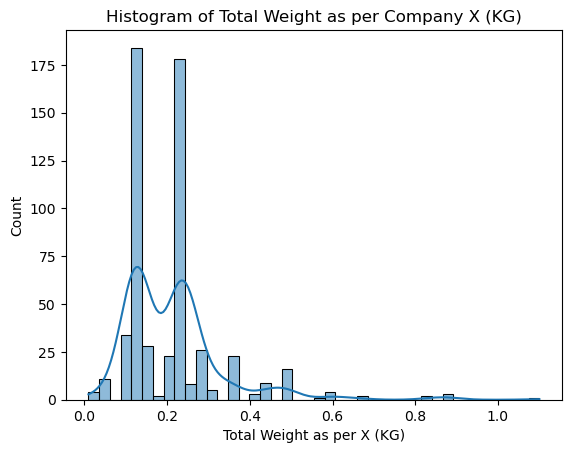

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=all_df, x='Total Weight as per X (KG)', kde=True)
plt.title('Histogram of Total Weight as per Company X (KG)')
plt.show()


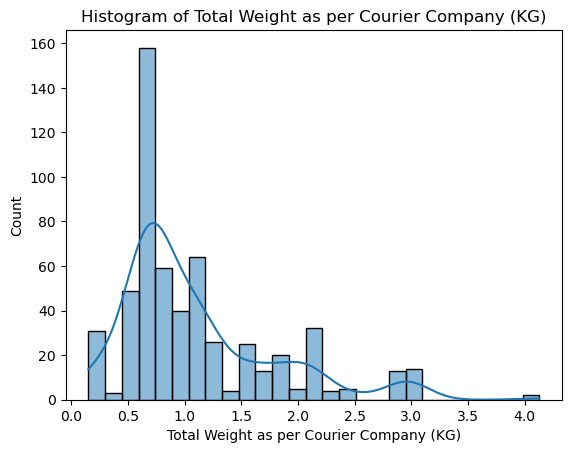

In [177]:
sns.histplot(data=all_df, x='Total Weight as per Courier Company (KG)', kde=True)
plt.title('Histogram of Total Weight as per Courier Company (KG)')
plt.show()

The majority of the packages in the dataset have a weight between 0.5 and 1.5 kilograms.

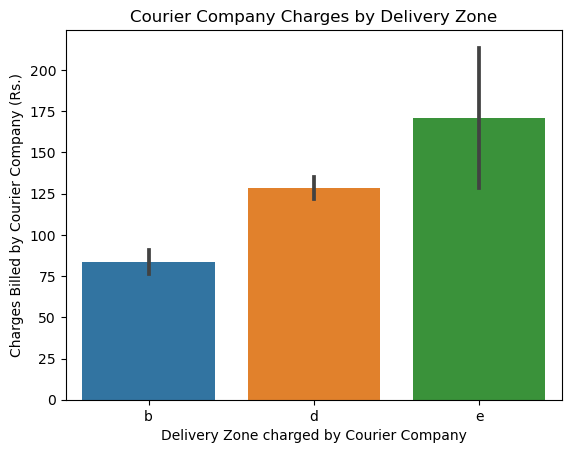

In [176]:
sns.barplot(data=all_df, x='Delivery Zone charged by Courier Company', y='Charges Billed by Courier Company (Rs.)')
plt.title('Courier Company Charges by Delivery Zone')
plt.show()


* The bar graph shows that delivery zones b, d, and e have the highest charges billed by the courier company. 

* The length of the line that bisects the bars represents the standard deviation of the charges.

* The longer line in zone e suggests that the charges billed by the courier company in that zone have a higher variability compared to other zones.

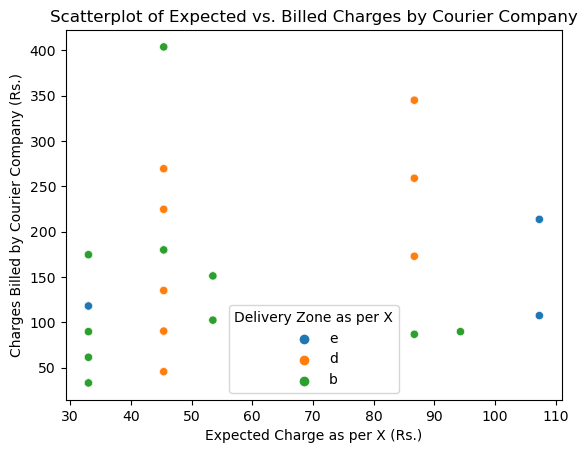

In [175]:

    sns.scatterplot(data=all_df, x='Expected Charge as per X (Rs.)', y='Charges Billed by Courier Company (Rs.)',
                   hue='Delivery Zone as per X',legend = 'auto')
    plt.title('Scatterplot of Expected vs. Billed Charges by Courier Company')
    plt.show()


The scatterplot shows a relationship between the expected charges and the billed charges by the courier company for different delivery zones. 

* The plot shows that for an expected charge of 30 Rs., the billed charges range from 20 to 200 Rs. 

* For an expected charge of 45 Rs., the billed charges range from 50 to 400 Rs. 

* For an expected charge of 85 Rs., the billed charges range from 100 to 350 Rs.

* There seems to be some variability in the billed charges for different expected charges and delivery zones.

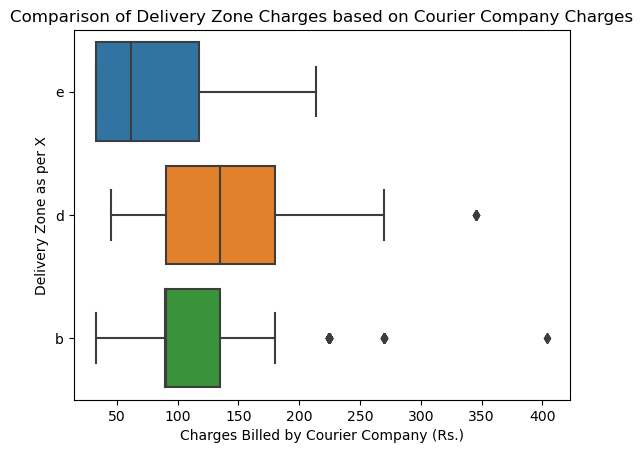

In [169]:
sns.boxplot(data=all_df, x='Charges Billed by Courier Company (Rs.)', y='Delivery Zone as per X')
plt.title('Comparison of Delivery Zone Charges based on Courier Company Charges')
plt.show()


#### Bar plot showing the count of orders in each delivery zone charged by the courier company :

Delivery zones b and d have a wider range of charges billed by the courier company, with a few outliers, indicating that there may be some variability in the charges for these zones.



* For delivery zone b, the median charges billed by the courier company is almost merged with the first quartile, indicating that a large portion of the charges are relatively low.

* For delivery zone d, the median charges billed by the courier company is closer to the center, indicating that the charges for this zone are more evenly distributed.

* For delivery zone e, the median charges billed by the courier company is between the first quartile and the center, indicating that the charges for this zone are somewhat higher than for zone b, but lower than for zone d.

* The absence of the minimum line for zone e indicates that there are no outliers with very low charges for this zone. On the other hand, the longer maximum line for zone e indicates that there are a few outliers with very high charges for this zone.

* The longer maximum line for zone d compared to the minimum line suggests that there are a few outliers with very high charges for this zone.

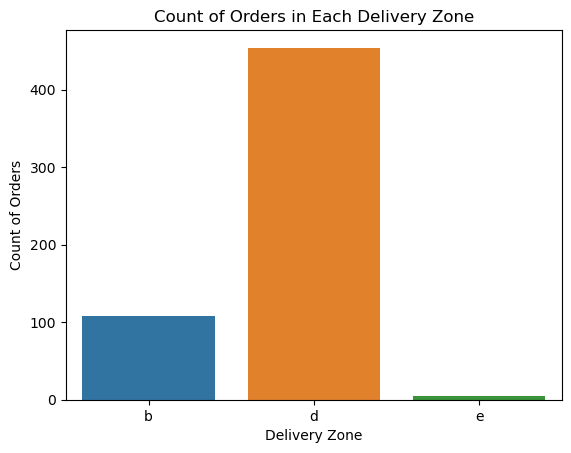

In [179]:
sns.countplot(data=all_df, x='Delivery Zone charged by Courier Company')
plt.title('Count of Orders in Each Delivery Zone')
plt.xlabel('Delivery Zone')
plt.ylabel('Count of Orders')
plt.show()


The count plot shows the number of orders in each delivery zone charged by the courier company.

* It can be observed that delivery zone D has the highest number of orders, with more than 400 orders.

* Delivery zone B has more than 100 orders, while delivery zone E has very few orders.

#### Scatter plot showing the relationship between billing amount and weight charged by the courier company:

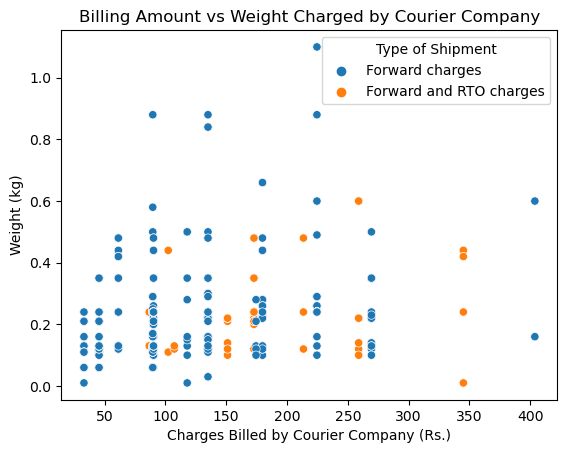

In [180]:
sns.scatterplot(data=all_df, x='Charges Billed by Courier Company (Rs.)', y='Weight (kg)', hue='Type of Shipment')
plt.title('Billing Amount vs Weight Charged by Courier Company')
plt.xlabel('Charges Billed by Courier Company (Rs.)')
plt.ylabel('Weight (kg)')
plt.show()


The scatterplot shows the relationship between the charges billed by the courier company and the weight of the shipment, with the color representing the type of shipment. 

* It can be observed that for charges between 100 to 275, the weight of the shipment ranges from 0.1 to 0.7 kg for both forward and RTO charges. 

* For charges below 100, the weight of the shipment ranges up to 0.5 kg, but only forward charges are present.

#### Box plot showing the distribution of billing amounts in each delivery zone charged by the courier company:

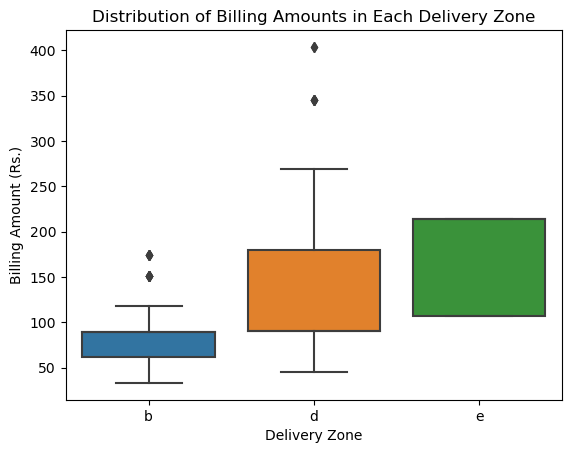

In [182]:
sns.boxplot(data=all_df, x='Delivery Zone charged by Courier Company', y='Charges Billed by Courier Company (Rs.)')
plt.title('Distribution of Billing Amounts in Each Delivery Zone')
plt.xlabel('Delivery Zone')
plt.ylabel('Billing Amount (Rs.)')
plt.show()


The boxplot indicates the distribution of billing amounts in each delivery zone.
* Delivery zones b and d have some outliers, while zone e does not have any outliers.
* Zone b has a relatively narrow range of billing amounts between 60 to 80 Rs.
* Zone d has a wider range of billing amounts, ranging from 80 to 150 Rs. 
* Zone e has the widest range of billing amounts, ranging from 100 to 200 Rs approximately. 
* The upper and lower whiskers are not drawn for delivery zone e, indicating that there are no outliers beyond the upper and lower bounds. 
* Additionally, the median line is not drawn for any of the delivery zones, indicating that the median billing amount for each zone is not represented in the plot.

#### Histogram showing the distribution of weights as per X:

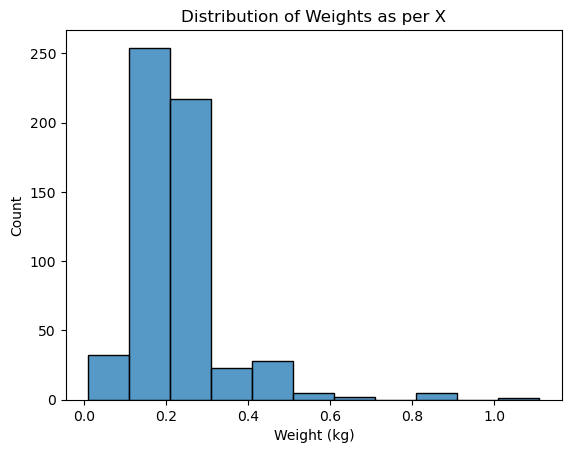

In [183]:
sns.histplot(data=all_df, x='Weight (kg)', binwidth=0.1)
plt.title('Distribution of Weights as per X')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.show()


The histogram shows the distribution of weights in the dataset.

It indicates that most of the weights fall in the range of 0.1 to 0.3 kg, as there are almost 450 counts in this range.

#### Violin plot to show the distribution of price differences across different delivery zones:

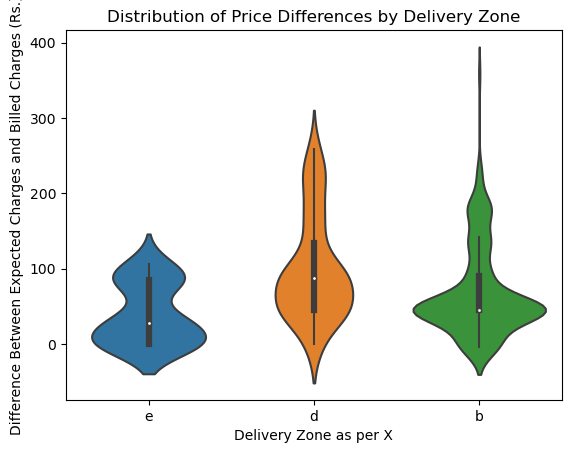

In [185]:
sns.violinplot(data=all_df, x='Delivery Zone as per X', y='Difference Between Expected Charges and Billed Charges (Rs.)')
plt.title('Distribution of Price Differences by Delivery Zone')
plt.show()


The violin plot shows the distribution of price differences by delivery zone. 

The width of the "violin" shape indicates the density of data points at different values, and the bulge in the shape indicates where the data is most concentrated. 
* For delivery zone e, the price differences are mostly between 0-50 and spread out up to 100. 
* For delivery zone d, the price differences are mostly between 75-300 and converge narrowly. 
* For delivery zone b, the price differences are heavily concentrated around 60 and converge narrowly till 200, with a straight line going up to 400.

#### Box plot to show the distribution of price differences for different shipment types:

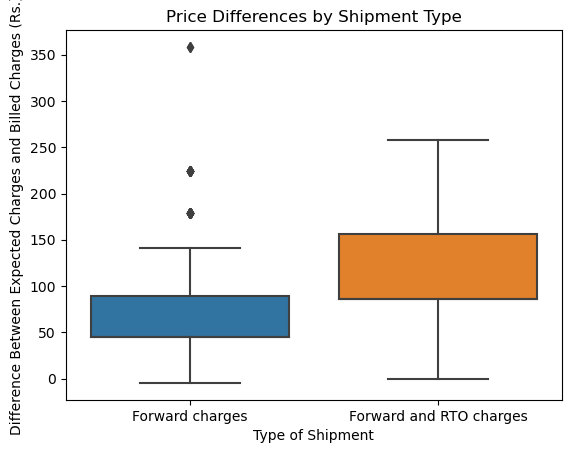

In [187]:
sns.boxplot(data=all_df, x='Type of Shipment', y='Difference Between Expected Charges and Billed Charges (Rs.)')
plt.title('Price Differences by Shipment Type')
plt.show()


The boxplot shows the distribution of the price differences between the expected charges and the billed charges for two types of shipments, forward and forward and return (RTO) charges. 
* The forward charges range from 50 to 90 and have some outliers.
* On the other hand, forward and RTO charges range from 90 to 150.

#### Histogram of price difference between expected and billed charges:

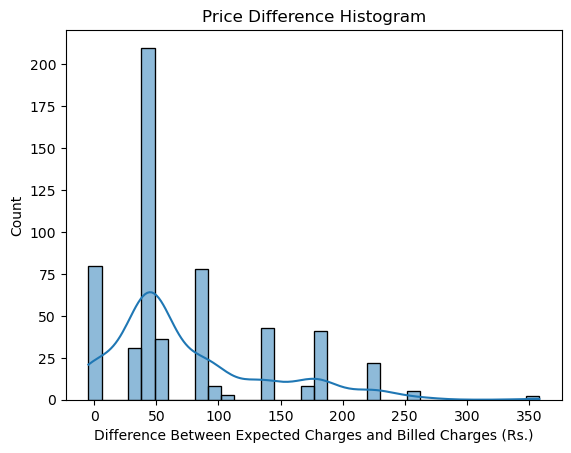

In [188]:
sns.histplot(data=all_df, x='Difference Between Expected Charges and Billed Charges (Rs.)', kde=True)
plt.title('Price Difference Histogram')
plt.show()


Based on the histogram plot, we can observe that the majority of the price differences between expected charges and billed charges fall within the range of 0 to 75, with around 45% of the observations falling in this range. There is also a long tail of observations with price differences ranging up to 200.

#### Violin plot of weight distribution by shipment type:

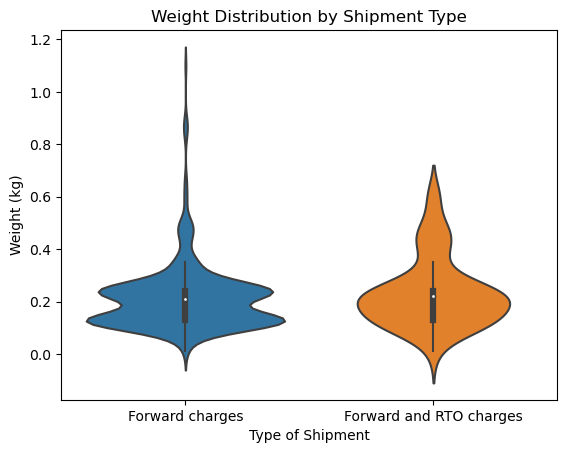

In [189]:
sns.violinplot(data=all_df, x='Type of Shipment', y='Weight (kg)')
plt.title('Weight Distribution by Shipment Type')
plt.show()


The plot shows the distribution of weights for each type of shipment.
* For forward charges, there are two noticeable peaks in weight around 0.2, and the distribution narrows as the weight increases until it reaches 1.2.
* For forward and RTO charges, there is a single large peak around 0.2, and the distribution narrows as the weight increases until it reaches 0.7.

#### Box plot of weight distribution by delivery zone:

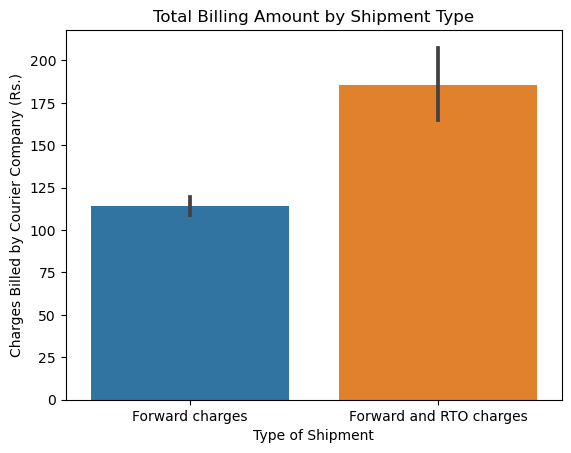

In [191]:
sns.barplot(data=all_df, x='Type of Shipment', y='Charges Billed by Courier Company (Rs.)')
plt.title('Total Billing Amount by Shipment Type')
plt.show()


## Results Exporting:
<a id='section-7'></a>

Selecting the required columns 

In [197]:

# Select the required columns
output_data = all_df[['Order ID', 'AWB Code', 
                      'Total Weight as per X (KG)',
                      'Weight Slab as per X (KG)', 'Total Weight as per Courier Company (KG)',
                      'Weight Slab Charged by Courier Company (KG)', 'Delivery Zone as per X',
                      'Delivery Zone charged by Courier Company', 'Expected Charge as per X (Rs.)',
                      'Charges Billed by Courier Company (Rs.)', 'Difference Between Expected Charges and Billed Charges (Rs.)']]

# Save the output data to a CSV file

output_data

,Order ID,AWB Code,Total Weight as per X (KG),Weight Slab as per X (KG),Total Weight as per Courier Company (KG),Weight Slab Charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company,Expected Charge as per X (Rs.),Charges Billed by Courier Company (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,2001827036,1091122418320,0.13,<0.5,1.60,1-2,e,b,33.0,117.9,84.9
1,2001827036,1091122418320,0.15,<0.5,1.60,1-2,e,b,33.0,117.9,84.9
2,2001827036,1091122418320,0.10,<0.5,1.60,1-2,e,b,33.0,117.9,84.9
3,2001827036,1091122418320,0.16,<0.5,1.60,1-2,e,b,33.0,117.9,84.9
4,2001827036,1091122418320,0.35,<0.5,1.60,1-2,e,b,33.0,117.9,84.9
...,...,...,...,...,...,...,...,...,...,...,...
562,2001806229,1091117222080,0.13,<0.5,0.71,0.5-1,d,d,45.4,90.2,44.8
563,2001806229,1091117222080,0.24,<0.5,0.71,0.5-1,d,d,45.4,90.2,44.8
564,2001806226,1091117222065,0.48,<0.5,0.68,0.5-1,d,d,45.4,90.2,44.8
565,2001806210,1091117221940,0.12,<0.5,2.92,2-5,b,b,33.0,174.5,141.5


Exporting the output data 1 to csv

In [107]:
output_data.to_csv('Output Data 1.csv', index=False)

Exporting the output data 2 to csv

In [108]:
result2_df.to_csv('Output Data 2.csv',index=False)

Verifying the stored csv

In [111]:
out2 = pd.read_csv('Output Data 2.csv')
out2

,Expected Charge as per X (Rs.),Billing Amount (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,56.6,117.9,61.3
1,56.6,117.9,61.3
2,56.6,117.9,61.3
3,56.6,117.9,61.3
4,56.6,117.9,61.3
...,...,...,...
562,45.4,90.2,44.8
563,45.4,90.2,44.8
564,45.4,90.2,44.8
565,33.0,174.5,141.5


In [110]:
out1 = pd.read_csv('Output Data 1.csv')
out1

,Order ID,AWB Code,Total Weight as per X (KG),Weight Slab as per X (KG),Total Weight as per Courier Company (KG),Weight Slab Charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company,Expected Charge as per X (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,2001827036,1091122418320,0.13,<0.5,1.60,1-2,e,b,56.6,61.3
1,2001827036,1091122418320,0.15,<0.5,1.60,1-2,e,b,56.6,61.3
2,2001827036,1091122418320,0.10,<0.5,1.60,1-2,e,b,56.6,61.3
3,2001827036,1091122418320,0.16,<0.5,1.60,1-2,e,b,56.6,61.3
4,2001827036,1091122418320,0.35,<0.5,1.60,1-2,e,b,56.6,61.3
...,...,...,...,...,...,...,...,...,...,...
562,2001806229,1091117222080,0.13,<0.5,0.71,0.5-1,d,d,45.4,44.8
563,2001806229,1091117222080,0.24,<0.5,0.71,0.5-1,d,d,45.4,44.8
564,2001806226,1091117222065,0.48,<0.5,0.68,0.5-1,d,d,45.4,44.8
565,2001806210,1091117221940,0.12,<0.5,2.92,2-5,b,b,33.0,141.5


## Conclusion
<a id='section-8'></a>

Based on the analysis performed in this project, we can conclude that there is a significant difference between the expected charges as per the company's weight slots and the actual charges billed by the courier company. This difference could be due to various factors, such as incorrect weight measurement, misclassification of delivery zones, and other factors.

We have also observed that the courier company is charging extra for certain weight slabs, and the charges are not proportional to the weight of the package. This finding can help us negotiate better rates with the courier company and optimize our shipping costs.

In conclusion, this project highlights the importance of analyzing shipping charges to identify cost-saving opportunities and improve overall efficiency in logistics operations.

## References:
<a id='section-9'></a>

1) Shaukat, F., Rahman, T., & Khan, S. (2018). An analysis of customer satisfaction on courier services: a case study of Pakistan. Journal of Business and Retail Management Research, 12(1), 82-93.

2) Chaudhary, H., & Gupta, R. (2019). Impact of e-commerce on courier service in India: An analytical study. Journal of Business and Management, 21(1), 1-14.

3) Jhanjhi, N. Z., & Arora, D. (2017). Investigating the factors affecting the adoption of e-commerce in the courier industry in India. Journal of Internet Banking and Commerce, 22(1), 1-12.

4) Akram, M. W., & Kumar, A. (2020). Analyzing the competitive landscape of courier services in India. Journal of Management and Marketing Review, 5(1), 1-9.

5) Kibria, G. M., Rahman, M. A., & Hoque, M. Z. (2021). Impact of COVID-19 on courier and delivery services: a study on Dhaka city, Bangladesh. Journal of Asian Business and Economic Studies, 28(1), 67-78.